### Лабораторная работа №1
Подготовил: Шапетин Максим ИНС-б-о-22-1
Вариант: 22

# Утилиты загрузки данных

Подключение библиотеки для доступа к наборам данных

In [ ]:
from sklearn import datasets
import numpy as np

## Готовый набор данных

Получение готового набора данных

In [ ]:
digits = datasets.load_digits()

Получение описания набора данных

In [ ]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Построение матрицы признаков для данных digits

In [ ]:
features = digits.data
target = digits.target
print('Признаки: ', features.shape)
print('Классы (целевая переменная): ', target.shape)
print('Признаки экземпляра 0\n', features[0])
print('Целевая переменная экземпляра 0\n', target[0])

Признаки:  (1797, 64)
Классы (целевая переменная):  (1797,)
Признаки экземпляра 0
 [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
Целевая переменная экземпляра 0
 0


Выполним визуализацию экземпляров готового набора данных (в виде изображений)

<Figure size 640x480 with 0 Axes>

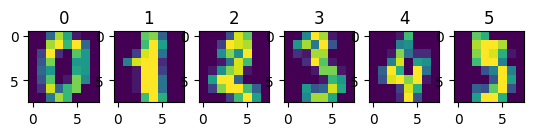

In [ ]:
from matplotlib import pyplot as plt
plt.figure()
N = 6
f, ax = plt.subplots(1,N)
for i in range(N):
  ax[i].imshow(features[i].reshape((8,8)))
  ax[i].set_title(f'{target[i]}')

## Искусственный набор данных

Если в процессе исследования потребовалось сделать s-образную кривую, то необходимо использовать `make_s_curve`

In [ ]:
from sklearn.datasets import make_s_curve

features, target = make_s_curve(n_samples=100, noise=0.0, random_state=1)

Выводим матрицу признаков и вектор целевых переменных (первые 5 экземпляров)

In [ ]:
print('Матрица признаков:\n', features[:5])
print('Целевой вектор:\n', target[:5])

Матрица признаков:
 [[-0.70473473  0.6532898   0.2905291 ]
 [ 0.87482925  1.0541162  -1.48443141]
 [ 0.99999942  1.7718842   1.00107796]
 [-0.95761958  0.71453952  1.288036  ]
 [ 0.18655523  1.8170703   1.98244448]]
Целевой вектор:
 [-0.78204918  2.07650943 -4.71131102 -1.86297161 -3.32924729]


Выполним визуализацию

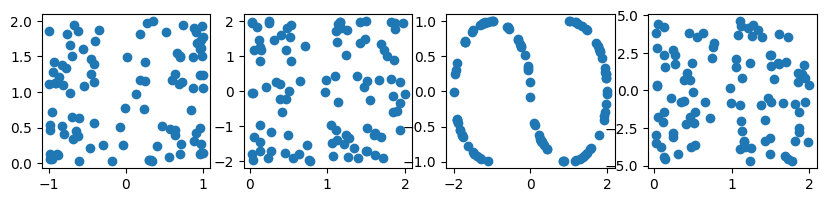

In [ ]:
X = features[:,0]
Y = features[:,1]
Z = features[:,2]
f, ax = plt.subplots(1,4,figsize=(10,2))
ax[0].scatter(X, Y)
ax[1].scatter(Y, Z)
ax[2].scatter(Z, X)
ax[3].scatter(Y, target)

## Сложный набор готовых данных

Пример использования утилиты `fetch_lfw_people`

Получение данных

In [ ]:
faces = datasets.fetch_lfw_people()
print(type(faces))

<class 'sklearn.utils._bunch.Bunch'>


In [ ]:
print(faces.data.shape)
faces_data = faces.data # матрица признаков (фото)
faces_target = faces.target # вектор целевых переменных
print(faces_data[0])
print(faces_target[0])

(13233, 2914)
[0.17124183 0.14901961 0.12287582 ... 0.09673203 0.09934641 0.09411765]
5360


Визуализация (несколько случайных экземпляров)

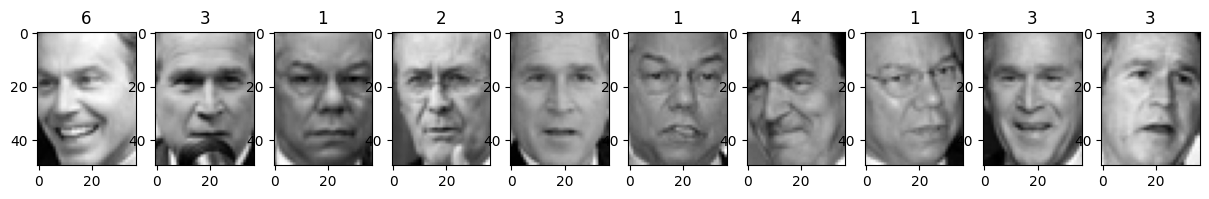

In [ ]:
from sklearn.datasets import fetch_lfw_people
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
faces_data = lfw_people.images  # Изображения лиц
faces_target = lfw_people.target  # Метки классов (индексы лиц)

# Получение формы изображений
image_shape = faces_data[0].shape  # Получение формы одного изображения

N = 10
f, ax = plt.subplots(1, N, figsize=(15, 8))
np.random.seed(0)

for i in range(N):
    rand_i = np.random.randint(faces_data.shape[0])  # Генерация случайного индекса
    ax[i].imshow(faces_data[rand_i], cmap='gray')  # Отображение изображения с учётом формы
    ax[i].set_title(f'{faces_target[rand_i]}')

plt.show()

# Контрольные вопросы:
1. Сколько признаков у каждого экземпляра в наборе данных, получаемого утилитой sklearn.datasets.make_moons()?

Ответ: У каждого экземпляра два признака (координаты в двумерном пространстве).

2. Опишите назначение метода numpy.random.seed().

Ответ: numpy.random.seed() используется для инициализации генератора случайных чисел, чтобы результаты были воспроизводимыми (одинаковыми при каждом запуске).

3. Опишите синтетические наборы данных, которые целесообразно использовать для задач кластеризации.

Ответ: Синтетические наборы данных, такие как make_blobs, make_moons и make_circles, целесообразно использовать для задач кластеризации, так как они позволяют тестировать алгоритмы на данных с разной формой кластеров и уровнями сложности.

4. Опишите игровые наборы данных, которые целесообразно использовать для регрессии.

Ответ: Игровые наборы данных, такие как sklearn.datasets.make_regression и boston (хотя последний устарел), подходят для регрессии, так как они содержат синтетические или простые реальные данные с зависимыми переменными, которые необходимо предсказать.

5. Опишите сложные реальные наборы данных, которые целесообразно использовать для классификации.

Ответ: Сложные реальные наборы данных, такие как CIFAR-10, MNIST или IMDB Reviews, используются для классификации, так как они содержат большое количество признаков и разнообразные категории, что делает их подходящими для тестирования и обучения моделей на реальных задачах.